**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# Apriori Algorithm for Frequent Itemset Mining

The Apriori algorithm is a classic technique in data mining used to discover frequent itemsets and association rules in transactional datasets. It's particularly useful for market basket analysis, where you want to find relationships between items that are frequently purchased together.

## What it Does:

The Apriori algorithm identifies:

*   **Frequent Itemsets:** Sets of items that appear together in a significant number of transactions.
*   **Association Rules:** Rules that describe relationships between items, indicating that the presence of some items implies the presence of others.

## Key Concepts:

*   **Itemset:** A collection of one or more items (e.g., {Milk, Bread}).
*   **Support:** The proportion of transactions that contain a given itemset. For example, if {Milk, Bread} appears in 30 out of 100 transactions, its support is 0.3 or 30%.
*   **Minimum Support (min_sup):** A user-defined threshold. Itemsets with support greater than or equal to `min_sup` are considered "frequent."
*   **Confidence:** The conditional probability of item Y occurring given that item X has occurred. `confidence(X -> Y) = support({X, Y}) / support({X})`
*   **Lift:** Measures how much more often X and Y occur together than if they were statistically independent. `lift(X -> Y) = confidence(X -> Y) / support({Y})`

## The Apriori Principle:

The core idea behind the Apriori algorithm is:

*   If an itemset is frequent, then all of its subsets must also be frequent.
*   If an itemset is infrequent, then all of its supersets must also be infrequent.

This principle is used to efficiently prune the search space for frequent itemsets.

## Algorithm Steps (Simplified):

1.  **Generate Candidate Itemsets of Length 1:** Create a list of all individual items.
2.  **Calculate Support:** Count the occurrences of each item and calculate its support. Remove infrequent items (below `min_sup`).
3.  **Generate Candidate Itemsets of Length k (k > 1):** Combine frequent itemsets of length k-1 to create candidate itemsets of length k. Use the Apriori principle to prune candidates.
4.  **Calculate Support:** Count the occurrences of each candidate k-itemset and calculate its support. Remove infrequent itemsets.
5.  **Repeat Steps 3 and 4:** Continue until no more frequent itemsets are found.
6.  **Generate Association Rules:** Create rules from the frequent itemsets based on minimum confidence and lift thresholds.

## Example:

Imagine these transactions:

1.  {Milk, Bread, Butter}
2.  {Milk, Bread}
3.  {Milk, Butter}
4.  {Bread, Butter}
5.  {Milk, Bread, Butter}

With `min_sup = 0.4`, the frequent itemsets would include {Milk}, {Bread}, {Butter}, {Milk, Bread}, {Milk, Butter}, and {Bread, Butter}, and {Milk, Bread, Butter}.

## Use Cases:

*   **Market Basket Analysis:** Identifying items that are frequently bought together in retail stores.
*   **Recommendation Systems:** Suggesting related items to customers based on their past purchases.
*   **Medical Diagnosis:** Finding associations between symptoms and diseases.
*   **Web Usage Mining:** Analyzing website traffic patterns.

## Advantages:

*   Easy to understand and implement.
*   Uses the Apriori principle to efficiently prune the search space.

## Disadvantages:

*   Can be computationally expensive for large datasets with many items.
*   Can generate a large number of rules, many of which might not be interesting or actionable.

This README provides a high-level overview of the Apriori algorithm. For more detailed information and implementations, further research is recommended.


In [ ]:
!pip install mlxtend pandas matplotlib

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

In [78]:
# --- 1. Create Sample Transaction Data ---
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Diapers', 'Beer'],
    ['Diapers', 'Beer'],
    ['Milk', 'Diapers'],
    ['Bread', 'Diapers'],
    ['Milk', 'Bread', 'Diapers']
]

# Convert transactions to one-hot encoded DataFrame (Crucial Step)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Beer,Bread,Butter,Diapers,Milk
0,False,True,True,False,True
1,False,True,False,False,True
2,False,False,True,False,True
3,False,True,True,False,False
4,False,True,True,False,True
5,True,False,False,True,True
6,True,False,False,True,False
7,False,False,False,True,True
8,False,True,False,True,False
9,False,True,False,True,True


In [84]:
# --- 2. Find Frequent Itemsets ---
min_support = 0.4 # Minimum support threshold (30%)
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:\n", frequent_itemsets)

Frequent Itemsets:
    support       itemsets
0      0.6        (Bread)
1      0.4       (Butter)
2      0.5      (Diapers)
3      0.7         (Milk)
4      0.4  (Milk, Bread)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
# --- 3. Generate Association Rules ---
min_confidence = 0.7  # Minimum confidence threshold (50%)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=None)

print("\nAssociation Rules:\n", rules)


Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                 0.4                 0.6      0.3   
1    (Butter)      (Milk)                 0.4                 0.7      0.3   

   confidence      lift  representativity  leverage  conviction  \
0        0.75  1.250000               1.0      0.06         1.6   
1        0.75  1.071429               1.0      0.02         1.2   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.333333  0.428571   0.375000    0.625000  
1       0.111111  0.375000   0.166667    0.589286  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


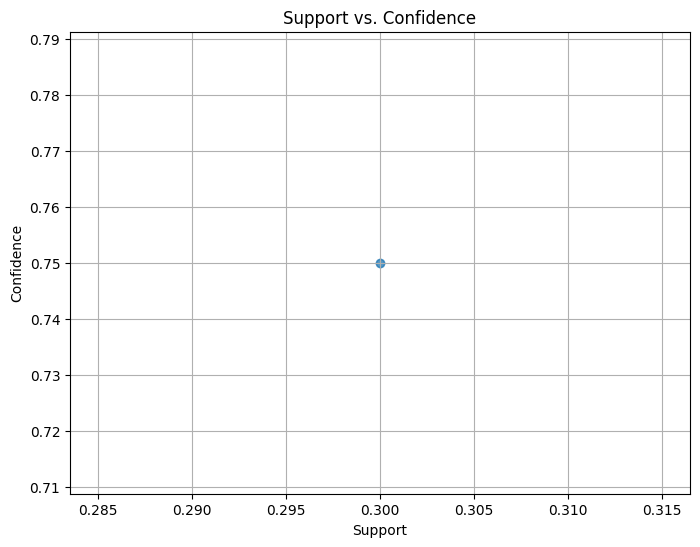

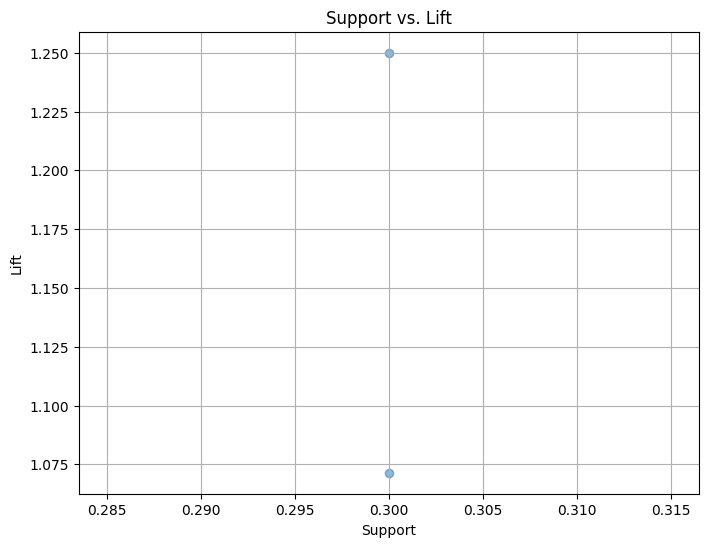

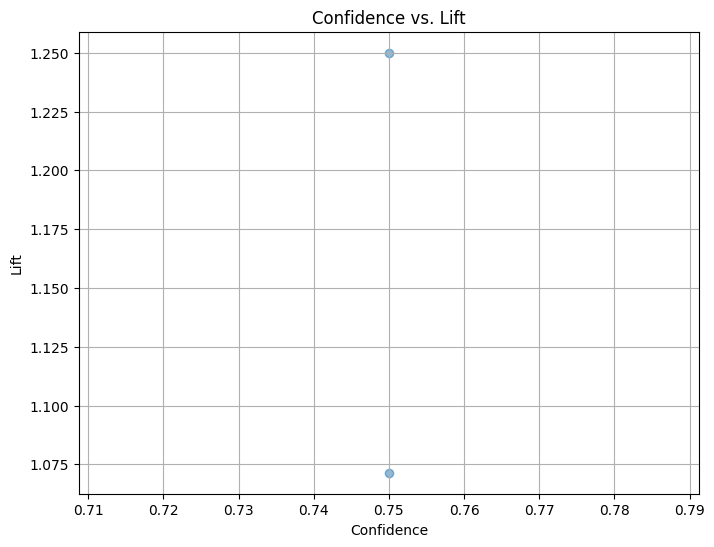

In [85]:
# --- 4. Analyze and Visualize Rules ---

# Scatter plot of support vs. confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()

# Scatter plot of support vs. lift
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.grid(True)
plt.show()

# Plot lift vs. confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift')
plt.grid(True)
plt.show()


In [97]:
# --- 5. Filtering Rules (Example) ---
# Filter rules with lift > 1
high_lift_rules = rules[rules['lift'] > 1]
print("\nRules with Lift > 1:\n", high_lift_rules)

# Filter rules with confidence > 0.7 and support > 0.2
filtered_rules = rules[(rules['confidence'] > 0.7) & (rules['support'] > 0.2)]
print("\nRules with Confidence > 0.7 and Support > 0.2:\n", filtered_rules)


Rules with Lift > 1:
   antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                 0.4                 0.6      0.3   
1    (Butter)      (Milk)                 0.4                 0.7      0.3   

   confidence      lift  representativity  leverage  conviction  \
0        0.75  1.250000               1.0      0.06         1.6   
1        0.75  1.071429               1.0      0.02         1.2   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.333333  0.428571   0.375000    0.625000  
1       0.111111  0.375000   0.166667    0.589286  

Rules with Confidence > 0.7 and Support > 0.2:
   antecedents consequents  antecedent support  consequent support  support  \
0    (Butter)     (Bread)                 0.4                 0.6      0.3   
1    (Butter)      (Milk)                 0.4                 0.7      0.3   

   confidence      lift  representativity  leverage  conviction  \
0        0.75  1.250000          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* With min_support = 0.2, we found that the itemsets {Butter, Bread} and {Butter, Milk} are frequent, appearing in 30% of transactions each.

* confidence(Butter -> Bread) = 0.75: When Butter is purchased, there's a 75% chance that Bread is also purchased.

* confidence(Butter -> Milk) = 0.75: When Butter is purchased, there's a 75% chance that Milk is also purchased.

* lift(Butter -> Bread) = 1.25: Butter and Bread are 1.25 times more likely to be purchased together than if they were purchased independently. This indicates a positive association.

* lift(Butter -> Milk) = 1.07: Butter and Milk are 1.07 times more likely to be purchased together than if they were purchased independently. This also indicates a positive association, but a slightly weaker one than Butter and Bread.

* Key takeaway: Lift is a more robust measure of association than confidence alone because it takes into account the support of both the antecedent and the consequent. It helps to identify truly interesting relationships that are not simply due to the high frequency of individual items.